In [1]:
####################  Data Analysis & Calculation  #####################3
import numpy as np   
import pandas as pd  
import datetime  

####################  Visuvalization & plotting  #####################3
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 

#################### Machine Learning #####################3
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder 

import warnings  
warnings.filterwarnings("ignore")


In [2]:
employee = pd.read_csv(r"churn.csv")
employee.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Missing Value

In [4]:
#Replacing spaces with null values in total charges column
employee['TotalCharges'] = employee["TotalCharges"].replace(" ",np.nan).astype(float) 
# string cannot be convert float direclty 

In [5]:
employee.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
employee.TotalCharges.fillna(employee.TotalCharges.mean(),inplace=True) # one column at a time bb

In [7]:
employee.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Removing Irrelavent Variable 

In [8]:
employee = employee.drop(['customerID'],axis=1)
employee.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
# #Employee Numeric columns
employee_num = employee.select_dtypes(include=[np.number])
employee_num.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15


In [10]:
employee_dummies = employee.select_dtypes(include=['object'])
employee_dummies.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [11]:
from sklearn.preprocessing import LabelEncoder
employee_dummies=employee_dummies.apply(LabelEncoder().fit_transform)
employee_dummies.head(3)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1


In [12]:
employee_combined = pd.concat([employee_num, employee_dummies],axis=1)
employee_combined.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,29.85,29.85,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,0,2,53.85,108.15,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


# Data Partition-1

In [13]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
X = employee_combined.drop('Churn',axis=1)
y = employee_combined[["Churn"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state =1)

In [14]:
print('The number of samples into the Train data is {}.'.format(x_train.shape[0]))
print('The number of samples into the Test data is {}.'.format(x_test.shape[0]))

The number of samples into the Train data is 5634.
The number of samples into the Test data is 1409.


# Model 2 -GBM (Gradient boosting)

### Model 2 -GBM (Gradient boosting)

abc=pd.DataFrame(gscv_GBM.cv_results_)
abc=abc.loc[:,['param_learning_rate','mean_test_score']]
abc.head()

In [15]:
# Define Model parameters to tune
# n_estimators=The number of boosting stages to perform.
model_parameters = {'n_estimators': [2,4,5], # number of tress
                    'max_depth':    [2, 3],      # maximum branches in tree
                    'learning_rate':[0.8, 0.6],
                    'min_samples_leaf':[100,200,270], ## child
                    'min_samples_split':[50,70,80]} #parent 

10,3  -- 5 times -- best = 78%
10,5  -- 5 times -- best = 88%  --- selected
50,3  -- 5 times -- best = 68%
50,5  -- 5 times -- best = 86%

In [27]:

# Gridsearch the parameters to find the best parameters.
model = GradientBoostingClassifier(random_state=10,loss="deviance",criterion="squared_error")
## random_state  -- The random number seed so that same random numbers are generated every time.

gscv_GBM = GridSearchCV(estimator=model, 
                    param_grid=model_parameters,  # comibnation = 4
                    cv=10,  # K-fold = 10 or 5  
                    verbose=1, ### message how many task done at backend
                    n_jobs=-1, ## parallel processing used entire processor
                    scoring='accuracy') ## accuracy evaluation

gscv_GBM.fit(x_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(criterion='squared_error',
                                                  random_state=10),
             n_jobs=-1,
             param_grid={'learning_rate': [0.8, 0.6], 'max_depth': [2, 3],
                         'min_samples_leaf': [100, 200, 270],
                         'min_samples_split': [50, 70, 80],
                         'n_estimators': [2, 4, 5]},
             scoring='accuracy', verbose=1)

In [17]:
print('The best parameter are -', gscv_GBM.best_params_)

The best parameter are - {'learning_rate': 0.8, 'max_depth': 3, 'min_samples_leaf': 270, 'min_samples_split': 50, 'n_estimators': 5}


In [18]:
# Re-fit the model with the best parameters
final_mod_GBM = GradientBoostingClassifier(**gscv_GBM.best_params_)
final_mod_GBM.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.8, min_samples_leaf=270,
                           min_samples_split=50, n_estimators=5)

In [19]:
# Prediction
train_pred = final_mod_GBM.predict(x_train)
test_pred = final_mod_GBM.predict(x_test)

In [20]:
train_pred

array([0, 0, 0, ..., 1, 0, 0])

# Confusion Matrix Train Data (2 Model)

In [21]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4113
           1       0.68      0.53      0.60      1521

    accuracy                           0.80      5634
   macro avg       0.76      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634



# Confusion Matrix Test Data (2 Model) 

In [22]:
print('Classification report for test data is : \n',
      classification_report(y_test, test_pred))

Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1061
           1       0.62      0.53      0.57       348

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.80      0.80      0.80      1409



# Importance Feature

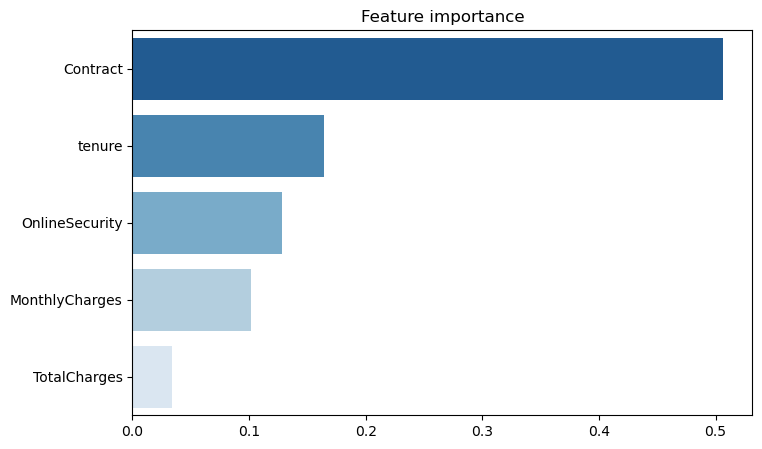

In [23]:
# Plot features importances
imp = pd.Series(data=final_mod_GBM.feature_importances_, index=final_mod_GBM.feature_names_in_).sort_values(ascending=False)
plt.figure(figsize=(8,5))
plt.title("Feature importance")
ax = sns.barplot(y=imp.head().index, x=imp.head().values, palette="Blues_r", orient='h')


# Gradiant Boosting Tree

pip install pydotplus

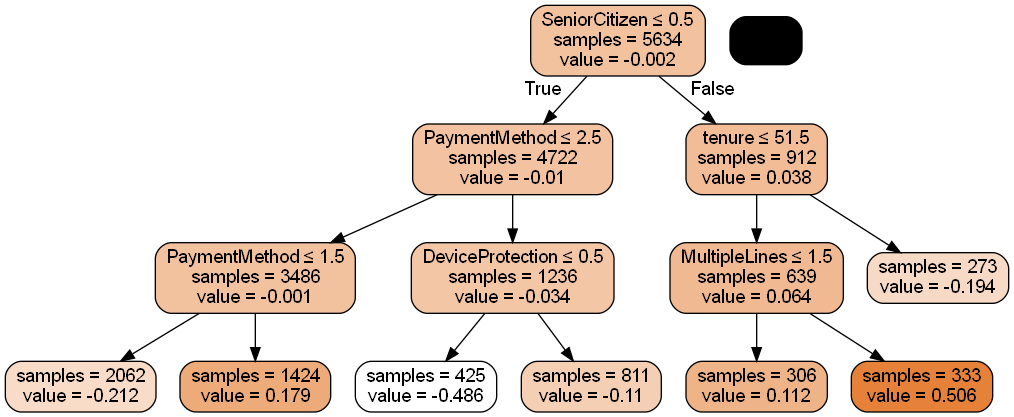

In [24]:
feature_list = list(X.columns)
churn=['Yes','No']

from sklearn.tree import export_graphviz
sub_tree = final_mod_GBM.estimators_[4, 0] #0 to 99  # Model ( Final_mod_GBM) = Give Tree


# Visualization. Install graphviz in your system
from pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = export_graphviz(sub_tree,
    out_file=None,
    class_names=churn,
    feature_names = feature_list, 
    filled=True, 
    rounded=True,
    special_characters=True,
    impurity=False)

graph = graph_from_dot_data(dot_data)
Image(graph.create_png())


# Finished

# Business Submission

#### Confusion Matrix Train Data (2 Model)

In [25]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      4113
           1       0.68      0.53      0.60      1521

    accuracy                           0.80      5634
   macro avg       0.76      0.72      0.73      5634
weighted avg       0.80      0.80      0.80      5634



### Model Export 

In [26]:
import os 
os.chdir(r"C:\Users\Hp\Desktop\Python Code\Boosting by Irfan")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Hp\\Desktop\\Python Code\\Boosting by Irfan'

In [ ]:
import pickle
pickle.dump(final_mod_GBM, open('GBModel.pkl','wb')) # model = final_mod_GBM

abc=pickle.load(open('GBModel.pkl','rb'))

abc.predict(x_train)